In [1]:
%load_ext autoreload
%autoreload 2

from run_models import load_model
from plot_utils import *
from DisruptionPredictors import DisruptionPredictorSM, DisruptionPredictorRF, DisruptionPredictorTinguely

from evaluate_performance import benchmark

horizons = np.linspace(0.001, 0.5, 11)

device = 'cmod'
dataset = 'random100'
numeric_feats = ['ip','Wmhd','n_e','kappa','li']

#device = 'synthetic'
#dataset = 'synthetic100'
#numeric_feats = ['ip', 'n_e', 'aminor', 'kappa', 'squareness', 'delta', 'li', 'Wmhd']


In [2]:
# Load models and create disruption predictors

cph_model, cph_transformer = load_model('cph', device, dataset)
cph_predictor = DisruptionPredictorSM("Cox Proportional Hazards", cph_model, numeric_feats, cph_transformer)

dcph_model, dcph_transformer = load_model('dcph', device, dataset)
dcph_predictor = DisruptionPredictorSM("Deep Cox Proportional Hazards", dcph_model, numeric_feats, dcph_transformer)

dsm_model, dsm_transformer = load_model('dsm', device, dataset)
dsm_predictor = DisruptionPredictorSM("Deep Survival Machines", dsm_model, numeric_feats, dsm_transformer)

dcm_model, dcm_transformer = load_model('dcm', device, dataset)
dcm_predictor = DisruptionPredictorSM("Deep Cox Mixture", dcm_model, numeric_feats, dcm_transformer)

rsf_model, rsf_transformer = load_model('rsf', device, dataset)
rsf_predictor = DisruptionPredictorSM("Random Survival Forest", rsf_model, numeric_feats, rsf_transformer)

rf_model, rf_transformer = load_model('rf', device, dataset)
rf_predictor = DisruptionPredictorRF("Random Forest", rf_model, numeric_feats, rf_transformer)

ting_model, ting_transformer = load_model('rf', device, dataset)
ting_predictor = DisruptionPredictorTinguely("Tinguely et al. 2019", ting_model, numeric_feats, ting_transformer)



Loaded model from models/cph_cmod_random100.pkl
Loaded model from models/dcph_cmod_random100.pkl
Loaded model from models/dsm_cmod_random100.pkl
Loaded model from models/dcm_cmod_random100.pkl
Loaded model from models/rsf_cmod_random100.pkl
Loaded model from models/rf_cmod_random100.pkl
Loaded model from models/rf_cmod_random100.pkl


In [4]:


au_rocs_cph = benchmark(cph_predictor, horizons, device, dataset+'_test')
#au_rocs_dcph = benchmark(dcph_predictor, horizons, device, dataset+'_test')
au_rocs_dcm = benchmark(dcm_predictor, horizons, device, dataset+'_test')
au_rocs_dsm = benchmark(dsm_predictor, horizons, device, dataset+'_test')
au_rocs_rsf = benchmark(rsf_predictor, horizons, device, dataset+'_test')
au_rocs_rf = benchmark(rf_predictor, horizons, device, dataset+'_test')

print(au_rocs_cph)
#print(au_rocs_dcph)
print(au_rocs_dcm)
print(au_rocs_dsm)
print(au_rocs_rsf)
print(au_rocs_rf)

[0.12637362637362637, 0.09340659340659341, 0.18131868131868129, 0.32417582417582413, 0.3571428571428571, 0.32967032967032966, 0.34065934065934067, 0.34065934065934067, 0.34615384615384615, 0.3516483516483516, 0.3406593406593406]
[0.8241758241758241, 0.2857142857142857, 0.24175824175824173, 0.20879120879120877, 0.12637362637362637, 0.06593406593406592, 0.06593406593406592, 0.1593406593406593, 0.10439560439560436, 0.12087912087912085, 0.14835164835164832]
[0.6428571428571428, 0.41758241758241754, 0.30769230769230765, 0.3021978021978022, 0.20329670329670324, 0.15934065934065933, 0.15934065934065933, 0.15934065934065933, 0.21978021978021972, 0.21978021978021972, 0.22527472527472525]
[0.6263736263736264, 0.32967032967032966, 0.3131868131868132, 0.32967032967032966, 0.1593406593406593, 0.16483516483516483, 0.21978021978021975, 0.23076923076923073, 0.3571428571428571, 0.36813186813186805, 0.3571428571428571]
[0.653846153846154, 0.26373626373626374, 0.24175824175824173, 0.22527472527472528, 0.

In [3]:
au_rocs_ting = benchmark(ting_predictor, horizons, device, dataset+'_test')
print(au_rocs_ting)

[0.8626373626373627, 0.7307692307692308, 0.7362637362637361, 0.6923076923076923, 0.6923076923076923, 0.5274725274725274, 0.5274725274725274, 0.3516483516483516, 0.21978021978021972, 0.1758241758241758, 0.17582417582417584]


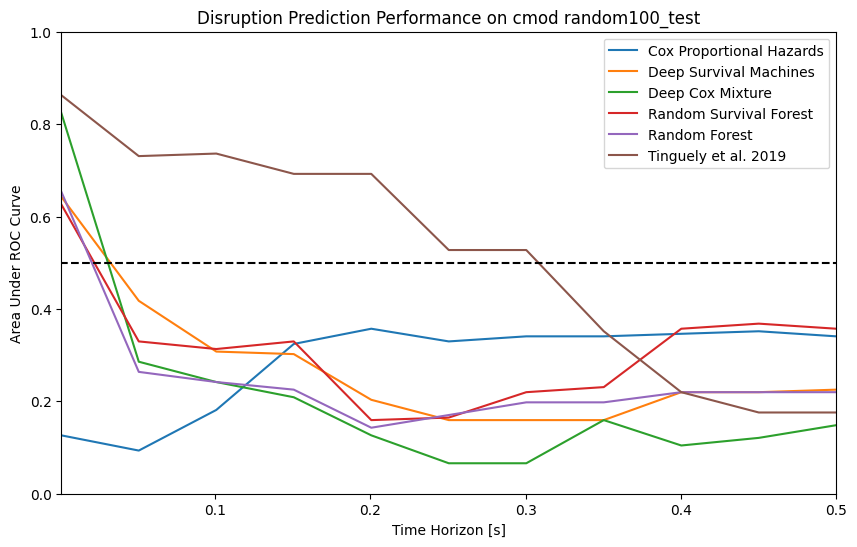

In [5]:
# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(horizons, au_rocs_cph, label='Cox Proportional Hazards')
#plt.plot(horizons, au_rocs_dcph, label='Deep Cox Proportional Hazards')
plt.plot(horizons, au_rocs_dsm, label='Deep Survival Machines')
plt.plot(horizons, au_rocs_dcm, label='Deep Cox Mixture')
plt.plot(horizons, au_rocs_rsf, label='Random Survival Forest')
plt.plot(horizons, au_rocs_rf, label='Random Forest')
plt.plot(horizons, au_rocs_ting, label='Tinguely et al. 2019')

# Plot horizontal line at y = 0.5 for reference to 'random guessing'
plt.plot([0, 1], [0.5, 0.5], linestyle='--', color='black')

plt.xlim([min(horizons), max(horizons)])
plt.ylim([0, 1.0])

plt.xlabel('Time Horizon [s]')
plt.ylabel('Area Under ROC Curve')
plt.title('Disruption Prediction Performance on '+device+' '+dataset+'_test')

plt.legend()
plt.show()



In [ ]:
#plot_shot(device, dataset+'_test', 1150805022)
plot_shot(device, dataset+'_test', 1150805016)